# exploring NIHAO sims
https://github.com/ntf229/NIHAO-SKIRT-Catalog

In [1]:
import os
import numpy as np
from astropy.table import Table

In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

```
ext='GALAXIES': one entry per galaxy (65 total)
- ['name'] = Name of the NIHAO galaxy
- ['stellar_mass'] = Stellar mass in M⊙
- ['sfr'] = Star formation rate in M⊙ / year averaged over 100 Myrs
- ['sfh'] = Star formation history in M⊙ as a function of age (['ages'])
- ['ceh'] = Chemical evolution hisotry in M⊙ as a function of age (['ages']) and metallicity (['metals'])
- ['ages'] = Age bins in years corresponding to ['sfh'] and ['ceh']
- ['metals'] = Metallicity bins corresponding to ['ceh']
- ['dust_mass'] = Dust mass in M⊙
- ['axis_ratios'] = Axis ratios (b/a)
- ['size'] = Side length of modelled the cube in pcs
```

In [3]:
# read galaxies
nihao = Table.read('/Users/chahah/data/dusty/nihao-integrated-seds.fits', hdu=1)

```
ext='SUMMARY': one per orientation (650 total)
    ['name'] = Name of the NIHAO galaxy
    ['stellar_mass'] = Stellar mass in M⊙
    ['sfr'] = Star formation rate in M⊙ / year averaged over 100 Myrs
    ['dust_mass'] = Dust mass in M⊙
    ['axis_ratio'] = Axis ratios (b/a)
    ['Av'] = Attenuation in the v-band in magnitudes
    ['attenuated_energy'] = Energy attenuated by dust in 10−23 erg s−1 cm−2
    ['emitted_energy'] = Energy emitted by dust in 10−23 erg s−1 cm−2
    ['bands'] = Name of broadband photometric bandpass
    ['flux'] = Flux of broadband photometric bandpass ['bands'] in Jansky
    ['flux_nodust'] = Dust-free flux of broadband photometric bandpass ['bands'] in Jansky
    ['size'] = Side length of modelled the cube in pcs
```

bands: 
```
(FUV, NUV, u, g, r, i, z, J, H, K, W1, W2, W3, W4, 70µm, 100µm, 160µm, 250µm, 350µm, 500µm)
```

In [8]:
nihao

name,stellar_mass,sfr,sfh [200],"ceh [200,200]",ages [200],metals [200],dust_mass,axis_ratios [10],size
bytes20,float32,float32,float32,float32,float32,float32,float32,float32,float32
g1.88e10,27596138.0,0.0006798847,0.0 .. 1931632.0,0.0 .. 277.9767,30514.725 .. 12621261000.0,7.88e-43 .. 0.0014029385,8730.565,0.33935276 .. 0.982491,18753.875
g1.89e10,20417390.0,0.0016043889,0.0 .. 492662.0,0.0 .. 0.0,13876.414 .. 12451892000.0,1.2675983e-28 .. 0.00232439,6929.918,0.27970204 .. 0.95281124,19576.438
g1.90e10,19923982.0,0.00059626007,0.0 .. 476356.0,0.0 .. 0.0,1536.9528 .. 12500678000.0,8.567391e-12 .. 0.0022367253,5657.5454,0.39079744 .. 0.9472649,20388.5
g2.34e10,22827680.0,0.00058120297,0.0 .. 580844.0,0.0 .. 301.14145,48402.508 .. 12639412000.0,2.8721576e-18 .. 0.0012835605,2123.2637,0.36051702 .. 0.9803925,31266.75
g2.63e10,71793620.0,0.0017848724,0.0 .. 10252560.0,0.0 .. 254401.0,20547.88 .. 12653596000.0,3.5381482e-34 .. 0.0014953441,4789.5625,0.49801266 .. 0.9540611,21116.25
g2.64e10,49986004.0,0.0006467592,0.0 .. 2947244.0,0.0 .. 138.98836,63321.87 .. 12757351000.0,1e-45 .. 0.0014433792,63832.156,0.35900164 .. 0.97954005,45095.375
g2.80e10,61071090.0,0.0028395338,0.0 .. 2963380.0,0.0 .. 469.086,37495.395 .. 12450171000.0,1.2839048e-21 .. 0.0018693722,26104.383,0.36207345 .. 0.9743558,42690.0
g2.83e10,51232010.0,0.0018223991,0.0 .. 2891072.0,0.0 .. 0.0,11989.081 .. 12622698000.0,1.9193663e-15 .. 0.001531742,48878.918,0.40767804 .. 0.9905128,31128.75
g2.94e10,99000250.0,0.0010373164,0.0 .. 5220744.0,0.0 .. 0.0,24286.637 .. 12668909000.0,2e-44 .. 0.0019047235,8357.094,0.34230465 .. 0.9870368,33712.87


In [4]:
nihao[:3]

name,stellar_mass,sfr,sfh [200],"ceh [200,200]",ages [200],metals [200],dust_mass,axis_ratios [10],size
bytes20,float32,float32,float32,float32,float32,float32,float32,float32,float32
g1.88e10,27596138.0,0.0006798847,0.0 .. 1931632.0,0.0 .. 277.9767,30514.725 .. 12621261000.0,7.88e-43 .. 0.0014029385,8730.565,0.33935276 .. 0.982491,18753.875
g1.89e10,20417390.0,0.0016043889,0.0 .. 492662.0,0.0 .. 0.0,13876.414 .. 12451892000.0,1.2675983e-28 .. 0.00232439,6929.918,0.27970204 .. 0.95281124,19576.438
g1.90e10,19923982.0,0.00059626007,0.0 .. 476356.0,0.0 .. 0.0,1536.9528 .. 12500678000.0,8.567391e-12 .. 0.0022367253,5657.5454,0.39079744 .. 0.9472649,20388.5


In [5]:
# read SEDS
sed = Table.read('/Users/chahah/data/dusty/nihao-integrated-seds.fits', hdu=2)

In [11]:
sed

name,stellar_mass,sfr,dust_mass,axis_ratio,Av,attenuated_energy,emitted_energy,bands [20],flux [20],flux_nodust [20],size
bytes20,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32
g1.88e10,27596138.0,0.0006798847,8730.565,0.33935276,0.005235248,29163432.0,13508347.0,FUV .. SPIRE500,1.1066348e-06 .. 4.604554e-06,1.1136742e-06 .. 1.3114167e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.41284832,0.0027124297,12984412.0,13547367.0,FUV .. SPIRE500,1.1101406e-06 .. 4.605631e-06,1.1136904e-06 .. 1.3124989e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.48637712,0.0072188065,19584786.0,13538715.0,FUV .. SPIRE500,1.1082468e-06 .. 4.6008154e-06,1.1136034e-06 .. 1.3076651e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.55971307,0.002622487,8435904.0,13563249.0,FUV .. SPIRE500,1.1111013e-06 .. 4.6050727e-06,1.1136801e-06 .. 1.3119374e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.63298494,-0.009913836,8209305.0,13565906.0,FUV .. SPIRE500,1.1111621e-06 .. 4.6028103e-06,1.1136423e-06 .. 1.3096663e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.70618063,-0.011742344,9780235.0,13563041.0,FUV .. SPIRE500,1.1106575e-06 .. 4.6020114e-06,1.1136271e-06 .. 1.3088651e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.78008616,-0.007898227,6699659.5,13572884.0,FUV .. SPIRE500,1.1113244e-06 .. 4.6029827e-06,1.1136455e-06 .. 1.3098394e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.85461855,0.0055736653,5904199.5,13574325.0,FUV .. SPIRE500,1.1114262e-06 .. 4.603956e-06,1.1136606e-06 .. 1.3108153e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.9265205,-0.010684397,5108655.0,13577025.0,FUV .. SPIRE500,1.111607e-06 .. 4.6030586e-06,1.1136457e-06 .. 1.3099154e-06,18753.875


In [6]:
sed[:3]

name,stellar_mass,sfr,dust_mass,axis_ratio,Av,attenuated_energy,emitted_energy,bands [20],flux [20],flux_nodust [20],size
bytes20,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32
g1.88e10,27596138.0,0.0006798847,8730.565,0.33935276,0.005235248,29163432.0,13508347.0,FUV .. SPIRE500,1.1066348e-06 .. 4.604554e-06,1.1136742e-06 .. 1.3114167e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.41284832,0.0027124297,12984412.0,13547367.0,FUV .. SPIRE500,1.1101406e-06 .. 4.605631e-06,1.1136904e-06 .. 1.3124989e-06,18753.875
g1.88e10,27596138.0,0.0006798847,8730.565,0.48637712,0.0072188065,19584786.0,13538715.0,FUV .. SPIRE500,1.1082468e-06 .. 4.6008154e-06,1.1136034e-06 .. 1.3076651e-06,18753.875


In [7]:
from astropy.io import fits

In [8]:
wave = fits.open('/Users/chahah/data/dusty/nihao-integrated-seds.fits')[3].data

In [9]:
seds = fits.open('/Users/chahah/data/dusty/nihao-integrated-seds.fits')[4].data

In [10]:
seds_unatten = fits.open('/Users/chahah/data/dusty/nihao-integrated-seds.fits')[5].data

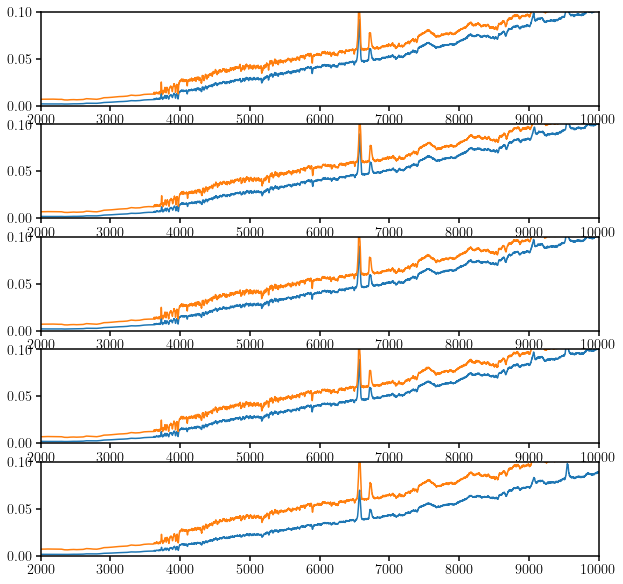

In [11]:
fig = plt.figure(figsize=(10,10))
for i in range(5): 
    sub = fig.add_subplot(5,1,i+1)
    sub.plot(wave, seds[-1-i])
    sub.plot(wave, seds_unatten[-1-i])
    sub.set_xlim(2e3, 1e4)
    sub.set_ylim(0, 0.1)